In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
mousenums = ['230', '355', '358', '673', '674', '816', '825']

In [3]:
# toyrat only
nearmeans = np.zeros(7)
farmeans = np.zeros(7)
rat1_mpos = np.zeros((0, 2))
rat1_avg = np.zeros(0)
nc = 0
near_percentages = np.zeros(7)
far_percentages = np.zeros(7)

for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'toyrat')
    mrdist = track['distanceMouseToyRatMS'].flatten()
    mpos = track['mouse_positionMS']
    mpos[:, 0] = minmaxscale(mpos[:, 0], vmin = 0, vmax = 70.0)
    mpos[:, 1] = minmaxscale(mpos[:, 1], vmin = 0, vmax = 26)
    calc = getcalc(foldnames, mouse, 'toyrat')
    calc = zscore(calc)
    nc += calc.shape[1]
    
    rat1_mpos = np.vstack((rat1_mpos, mpos))
    rat1_avg = np.hstack((rat1_avg, np.mean(calc, axis = 1)))
    
    near = (mrdist < 0.2*np.max(mrdist))
    far = (mpos[:, 0] < 0.2*np.max(mpos[:, 0]))
    
    nearmeans[i] = np.mean(calc[near])
    farmeans[i] = np.mean(calc[far])
    
    near_percentages[i] = np.mean(near)
    far_percentages[i] = np.mean(far)

In [4]:
nearmeans

array([-0.02249524, -0.03993838,  0.00275914,  0.12223689,  0.06473523,
        0.03252471, -0.01830761])

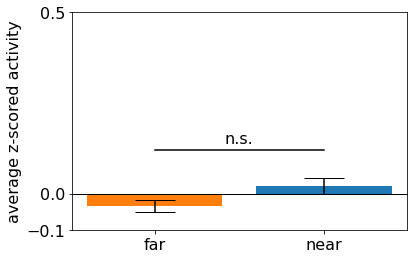

In [5]:
plt.bar(1, np.mean(nearmeans))
plt.errorbar(1, np.mean(nearmeans), sem(nearmeans), fmt='k_', capsize=20, ms=0)
plt.bar(0, np.mean(farmeans))
plt.errorbar(0, np.mean(farmeans), sem(farmeans), fmt='k_', capsize=20, ms=0)
plt.xticks([0, 1], ['far', 'near'])
plt.ylabel('average z-scored activity')
plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(-0.1, 0.5)
plt.yticks([-0.1, 0, 0.5])
plt.plot([0, 1], [0.12, 0.12], 'k')
plt.text(0.5, 0.14, 'n.s.', ha='center')

plt.savefig('./elife_figs/3s2C.svg')

In [6]:
ranksums(nearmeans, farmeans)

RanksumsResult(statistic=1.8527420384998257, pvalue=0.06391934147515746)

In [7]:
xbins = np.linspace(0, 70, 70*1+1)
ybins = np.linspace(0, 26, 26*1+1)

In [8]:
poshist = np.histogram2d(rat1_mpos[:, 0], rat1_mpos[:, 1], [xbins, ybins])

(0.0, 26.0)


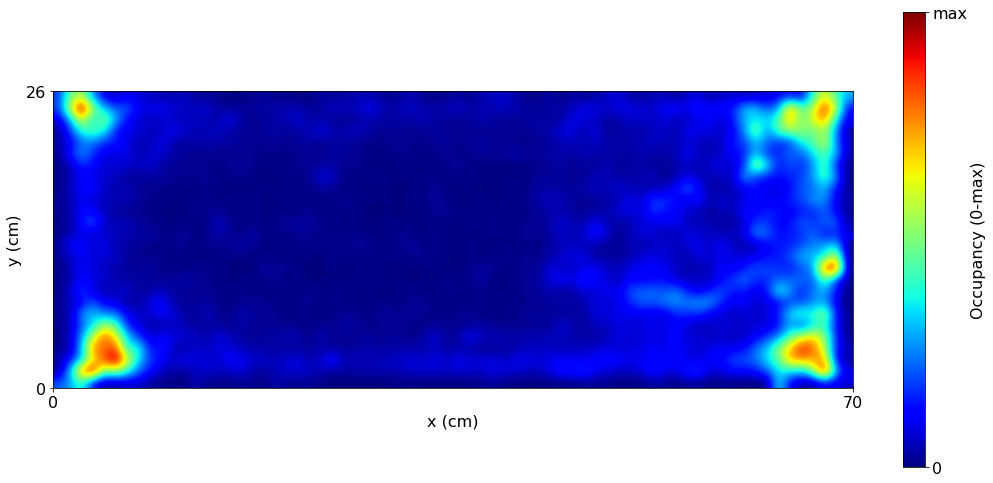

In [9]:
plt.figure(figsize=(15, 7))

plt.imshow(poshist[0].T/np.sum(poshist[0]), cmap='jet', origin='lower', extent=[0, 70, 0, 26], interpolation='bicubic')
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.xticks([0, 70])
plt.yticks([0, 26])
cbar = plt.colorbar()
cbar.set_label('Occupancy (0-max)')
print(plt.gca().get_ylim())
cbar.set_ticks(cbar.ax.get_ylim())
cbar.set_ticklabels(['0', 'max'])
plt.tight_layout()

plt.savefig('./elife_figs/3s2Ab.svg')

In [10]:
np.mean(near_percentages), np.mean(far_percentages)

(0.23964696398951774, 0.2704469450584189)

In [11]:
near_percentages

array([0.10302949, 0.24067909, 0.36251937, 0.21712404, 0.18714223,
       0.28711003, 0.27992449])

RanksumsResult(statistic=-0.7027642214999339, pvalue=0.48220269762779056)


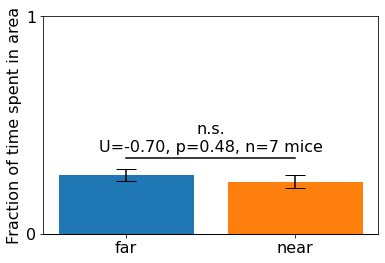

In [12]:
#plt.figure(figsize=(15, 15))
plt.bar(0, np.mean(far_percentages))
plt.errorbar(0, np.mean(far_percentages), sem(far_percentages), fmt='k_', ms=0, capsize=10)

plt.bar(1, np.mean(near_percentages))
plt.errorbar(1, np.mean(near_percentages), sem(near_percentages), fmt='k_', ms=0, capsize=10)

plt.xticks([0, 1], ['far', 'near'])
plt.ylabel('Fraction of time spent in area')
plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(0, 1.0)
plt.yticks([0, 1])
plt.plot([0, 1], [0.35, 0.35], 'k')
plt.text(0.5, 0.38, 'n.s.\nU=-0.70, p=0.48, n=7 mice', ha='center')

print(ranksums(near_percentages, far_percentages))

plt.savefig('./elife_figs/3s2Bb.svg')

In [2]:
mousenums = ['230', '355', '362', '673', '674', '816', '825']

In [3]:
# rat only
nearmeans = np.zeros(7)
farmeans = np.zeros(7)
rat1_mpos = np.zeros((0, 2))
rat1_avg = np.zeros(0)
nc = 0
near_percentages = np.zeros(7)
far_percentages = np.zeros(7)
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'rat1')
    mrdist = track['distanceMouseRatMS'].flatten()
    mpos = track['mouse_positionMS']
    mpos[:, 0] = minmaxscale(mpos[:, 0], vmin = 0, vmax = 74.5, refmax = np.max(track['rat_positionMS'][:, 0]))
    mpos[:, 1] = minmaxscale(mpos[:, 1], vmin = 0, vmax = 26)
    calc = getcalc(foldnames, mouse, 'rat1')
    calc = zscore(calc)
    nc += calc.shape[1]
    
    rat1_mpos = np.vstack((rat1_mpos, mpos))
    rat1_avg = np.hstack((rat1_avg, np.mean(calc, axis = 1)))
    
    near = (mrdist < 0.2*np.max(mrdist))
    far = (mpos[:, 0] < 0.2*np.max(mpos[:, 0]))
    
    nearmeans[i] = np.mean(calc[near])
    farmeans[i] = np.mean(calc[far])
    
    near_percentages[i] = np.mean(near)
    far_percentages[i] = np.mean(far)

RanksumsResult(statistic=-3.1304951684997055, pvalue=0.001745118699528905)


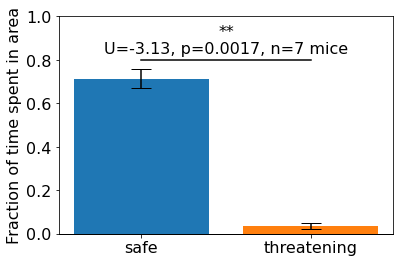

In [15]:
plt.bar(0, np.mean(far_percentages))
plt.errorbar(0, np.mean(far_percentages), sem(far_percentages), fmt='k_', ms=0, capsize=10)

plt.bar(1, np.mean(near_percentages))
plt.errorbar(1, np.mean(near_percentages), sem(near_percentages), fmt='k_', ms=0, capsize=10)

plt.xticks([0, 1], ['safe', 'threatening'])
plt.ylabel('Fraction of time spent in area')
plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(0, 1.0)
plt.plot([0, 1], [0.8, 0.8], 'k')
plt.text(0.5, 0.83, '**\nU=-3.13, p=0.0017, n=7 mice', ha='center')

print(ranksums(near_percentages, far_percentages))

plt.savefig('./elife_figs/3s2Bt.svg')

In [16]:
xbins = np.linspace(0, 70, 70*1+1)
ybins = np.linspace(0, 26, 26*1+1)

In [17]:
poshist = np.histogram2d(rat1_mpos[:, 0], rat1_mpos[:, 1], [xbins, ybins])

(0.0, 26.0)


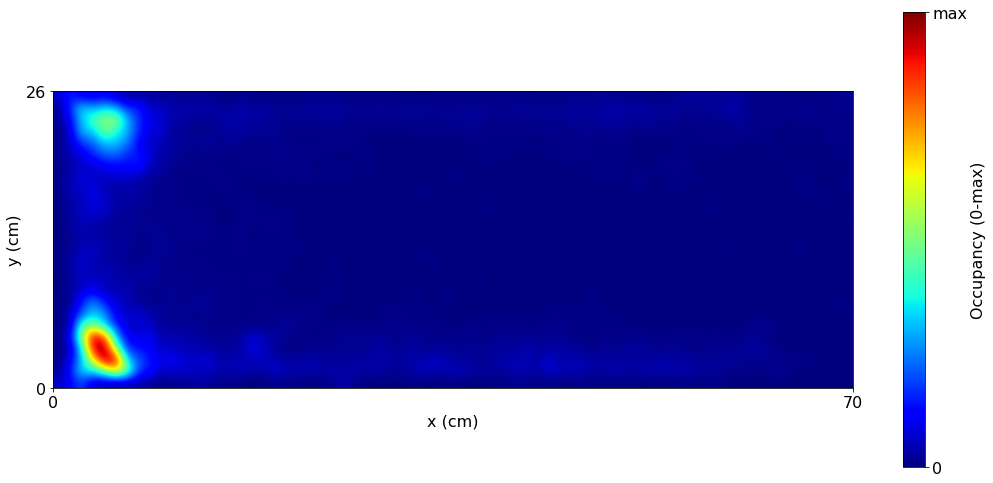

In [18]:
plt.figure(figsize=(15, 7))
plt.imshow(poshist[0].T/np.sum(poshist[0]), cmap='jet', origin='lower', extent=[0, 70, 0, 26], interpolation='bicubic')
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.xticks([0, 70])
plt.yticks([0, 26])
cbar = plt.colorbar()
cbar.set_label('Occupancy (0-max)')
print(plt.gca().get_ylim())
cbar.set_ticks(cbar.ax.get_ylim())
cbar.set_ticklabels(['0', 'max'])
plt.tight_layout()

plt.savefig('./elife_figs/3s2At.svg')

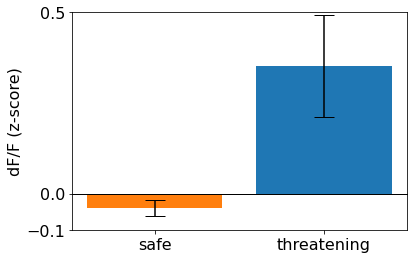

In [19]:
plt.bar(1, np.mean(nearmeans))
plt.errorbar(1, np.mean(nearmeans), sem(nearmeans), fmt='k_', capsize=10, ms=0)
plt.bar(0, np.mean(farmeans))
plt.errorbar(0, np.mean(farmeans), sem(farmeans), fmt='k_', capsize=10, ms=0)
plt.xticks([0, 1], ['safe', 'threatening'])
plt.ylabel('dF/F (z-score)')
plt.ylim(-0.1, 0.5)
plt.yticks([-0.1, 0, 0.5])
plt.plot(0, 0, 'k_', ms=2000)

plt.savefig('./elife_figs/3Cr.svg')

In [20]:
ranksums(nearmeans, farmeans)

RanksumsResult(statistic=2.23606797749979, pvalue=0.025347318677468252)

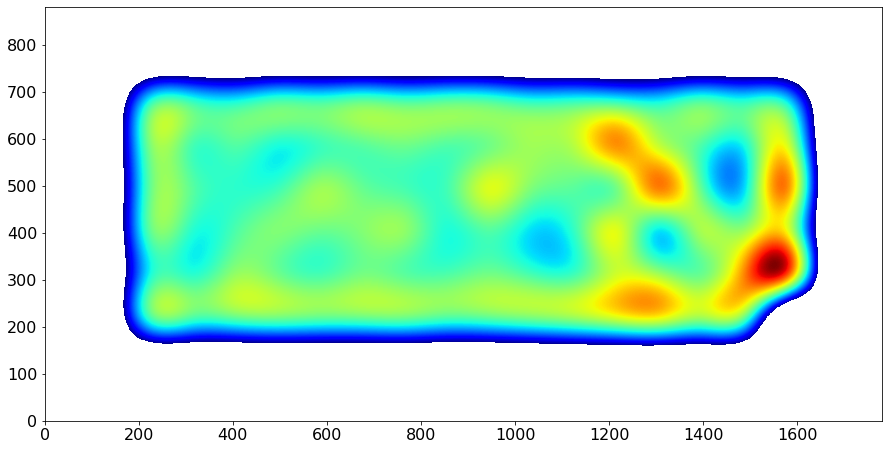

In [21]:
rat1heatmap, xin, yin = plotheatmap(rat1_mpos, rat1_avg, step = 4.5, interpstep = 0.05, returnxy = True)
plt.savefig('./elife_figs/3Cl.svg')

In [5]:
nearmus = []
farmus = []
rat1_mpos = np.zeros((0, 2))
rat1_avg = np.zeros(0)
cta = []
for i, mouse in enumerate(mousenums):
    track, neur, behav = getdicts(foldnames, mouse, 'rat1')
    track1, neur1, behav1 = getdicts(foldnames, mouse, 'epm')
    mrdist = track['distanceMouseRatMS'].flatten()
    mpos = track['mouse_positionMS']
    mpos[:, 0] = minmaxscale(mpos[:, 0], vmin = 0, vmax = 74.5, refmax = np.max(track['rat_positionMS'][:, 0]))
    mpos[:, 1] = minmaxscale(mpos[:, 1], vmin = 0, vmax = 34.5)
    calc1, calc = getcalcs(foldnames, mouse, 'epm', 'rat1')
    calc = zscore(calc)
    nc += calc.shape[1]
    
    rat1_mpos = np.vstack((rat1_mpos, mpos))
    rat1_avg = np.hstack((rat1_avg, np.mean(calc, axis = 1)))
    
    near = (mrdist < 0.2*np.max(mrdist))
    far = (mpos[:, 0] < 0.2*np.max(mpos[:, 0]))
    
    for cell in range(calc.shape[1]):
        nearmus.append(np.mean(calc[near, cell]))
        farmus.append(np.mean(calc[far, cell]))
        cta.append(celltypebehav(calc1[:, cell], behav1))
cta = np.array(cta)
nearmus = np.array(nearmus)
farmus = np.array(farmus)

Text(0.5, 1.0, 'threatening side')

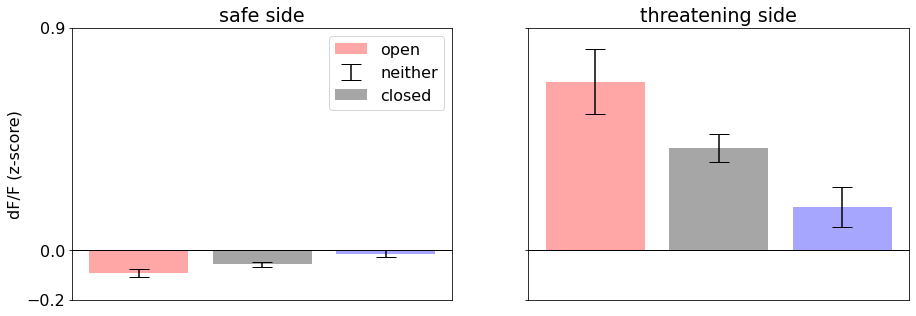

In [6]:
colors = ['r', 'k', 'b']

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

plt.sca(ax[0])
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(farmus[cta==typ]), color=colors[i], alpha=0.35)
    plt.errorbar(i, np.mean(farmus[cta==typ]), sem(farmus[cta==typ]), fmt='k_', ms=0, capsize=10)
plt.legend(['open', 'neither', 'closed'])
plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(-0.2, 0.9)
plt.yticks([-0.2, 0, 0.9])
plt.xticks([])
plt.title('safe side')
plt.ylabel('dF/F (z-score)')

    
plt.sca(ax[1])
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(nearmus[cta==typ]), color=colors[i], alpha=0.35)
    plt.errorbar(i, np.mean(nearmus[cta==typ]), sem(nearmus[cta==typ]), fmt='k_', ms=0, capsize=10)
plt.plot(0, 0, 'k_', ms=2000)
plt.xticks([])
plt.title('threatening side')

plt.savefig('./elife_figs/3F.svg')

In [24]:
ranksums(farmus[cta=='o'], farmus[cta=='c'])

RanksumsResult(statistic=-3.8219522601606855, pvalue=0.0001323993253303061)

In [25]:
ranksums(nearmus[cta=='o'], nearmus[cta=='c'])

RanksumsResult(statistic=3.0462653975073835, pvalue=0.0023170321704412897)

In [8]:
for typ in ['o', 'n', 'c']:
    print(ranksums(farmus[cta==typ], nearmus[cta==typ]))

RanksumsResult(statistic=-5.976037724908946, pvalue=2.2863007748202517e-09)
RanksumsResult(statistic=-6.872818740328336, pvalue=6.294552797092015e-12)
RanksumsResult(statistic=-1.4883965065061824, pvalue=0.13664635736313166)


In [9]:
from scipy.stats import wilcoxon

In [10]:
for typ in ['o', 'n', 'c']:
    print(wilcoxon(farmus[cta==typ], nearmus[cta==typ]))

WilcoxonResult(statistic=261.0, pvalue=1.8928270155100183e-07)
WilcoxonResult(statistic=2858.0, pvalue=5.1520175583045006e-11)
WilcoxonResult(statistic=1475.0, pvalue=0.06316631400912984)
